In [ ]:
# Note: restart runtime after this import before running the augmentations
!pip install -U augly
!sudo apt-get install python3-magic

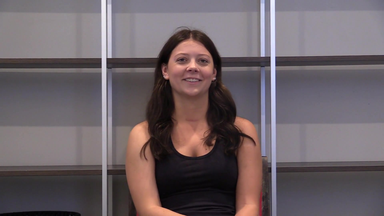

In [30]:
import os
import augly.image as imaugs
import augly.utils as utils
from IPython.display import display

# Get input image, scale it down to avoid taking up the whole screen
input_img_path = os.path.join(
    utils.TEST_URI, "image", "inputs", "dfdc_1.jpg"
)

# We can use the AugLy scale augmentation
input_img = imaugs.scale(input_img_path, factor=0.2)
display(input_img)

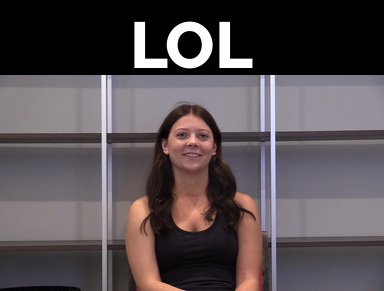

In [31]:
# Now we can apply various augmentations to the scaled image!
display(
    imaugs.meme_format(
        input_img,
        caption_height=75,
        meme_bg_color=(0, 0, 0),
        text_color=(255, 255, 255),
    )
)

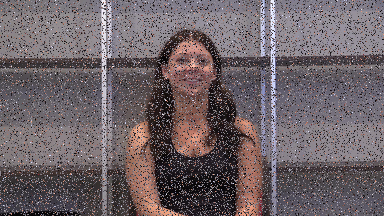

[{'dst_height': 216,
  'dst_width': 384,
  'factor': 0.3,
  'intensity': 30.0,
  'name': 'shuffle_pixels',
  'output_path': None,
  'seed': 10,
  'src_height': 216,
  'src_width': 384}]

In [32]:
"""
You can optionally pass in a metadata list, to which metadata about the
augmentation will be appended, including kwargs, input & output dimensions,
and intensity (defined based on the kwargs for each augmentation).
"""
meta = []
display(imaugs.shuffle_pixels(input_img, factor=0.3, metadata=meta))
meta

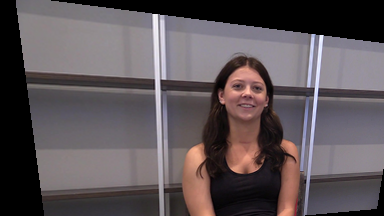

[{'crop_out_black_border': False,
  'dst_height': 216,
  'dst_width': 384,
  'dx': 0.0,
  'dy': 0.0,
  'intensity': 30.0,
  'name': 'perspective_transform',
  'output_path': None,
  'seed': 42,
  'sigma': 30.0,
  'src_height': 216,
  'src_width': 384}]

In [33]:
# For all the augmentations, we have class-based definitions as well as
# functional
meta = []
aug = imaugs.PerspectiveTransform(sigma=30.0)
display(aug(input_img, metadata=meta))
meta

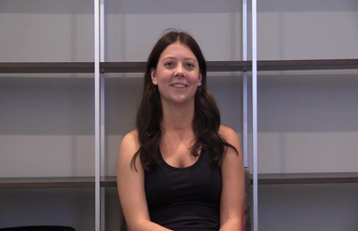

[]

In [34]:
"""
For some augmentations, we also provide versions that will randomly sample
from a set of parameters (e.g. for ChangeAspectRatio, RandomAspectRatio
samples an emoji from Twitter's Twemoji set which we provide in the augly
package). The metadata will contain the actual sampled param values.
"""
meta = []
aug = imaugs.RandomAspectRatio()
display(aug(input_img))
meta

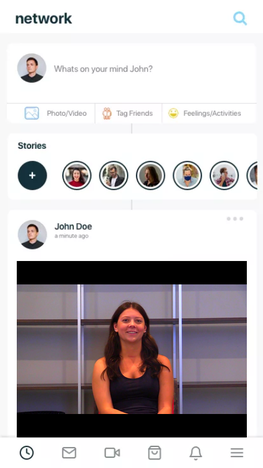

In [35]:
# You can also compose several transformations together
aug = imaugs.Compose(
    [
        imaugs.Saturation(factor=2.0),
        imaugs.OverlayOntoScreenshot(
            template_filepath=os.path.join(
                utils.SCREENSHOT_TEMPLATES_DIR, "mobile.png"
            ),
        ),
        imaugs.Scale(factor=0.6),
    ]
)
display(aug(input_img))

In [ ]:
# AugLy also integrates seamlessly with PyTorch transforms
# Note: you must have torchvision installed, which it is by default in colab
import torchvision.transforms as transforms
from PIL import Image

#Pytorch tensors
aug = transforms.Compose(
    [
        imaugs.Brightness(factor=2.0),
        imaugs.RandomRotation(),
        transforms.ToTensor(),
    ]
)
type(aug(input_img))

In [37]:
#Image Tensors
TRANSFORMS = imaugs.Compose( [
        imaugs.Brightness(factor=2.0),
        imaugs.RandomRotation(),
    ]
)

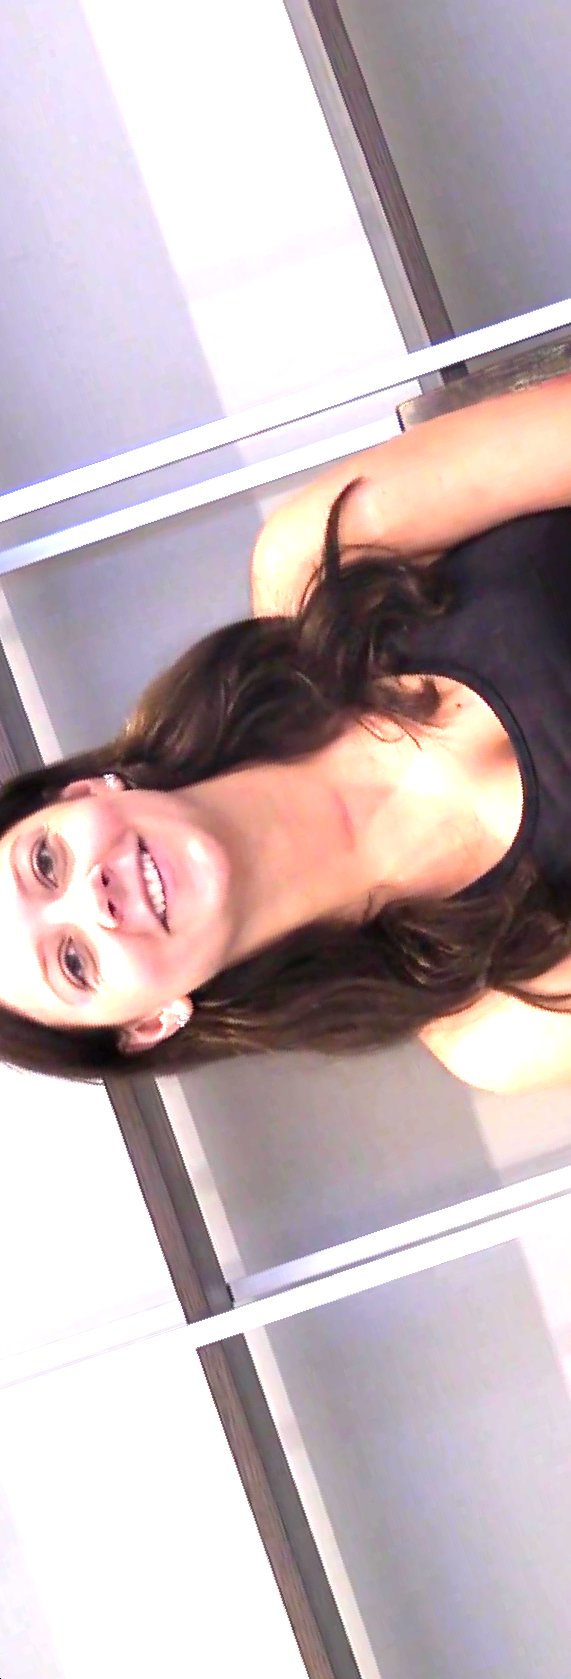

In [38]:
# aug_image is a PIL image with your augs applied!
# aug_tensor_image is a Tensor with your augs applied!
image = Image.open(input_img_path)
aug_image=TRANSFORMS(image)
aug_tensor_image = aug(image)

#Display
display(aug_image)

In [40]:
# We also provide a numpy wrapper in case your data is in np.ndarray format
import numpy as np
from augly.image import aug_np_wrapper, overlay_emoji

np_image = np.zeros((300, 300))
# pass in function arguments as kwargs
np_aug_img = aug_np_wrapper(np_image, overlay_emoji, **{'opacity': 0.5, 'y_pos': 0.45})
type(np_aug_img)

numpy.ndarray